Import Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
import warnings
warnings.filterwarnings("ignore")


## Reading the Data

In [3]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


In [4]:
df['Churn'].value_counts()

0    3267
1     674
Name: Churn, dtype: int64

## Check and Delete the Duplicate

In [5]:
df = df.drop_duplicates()

In [6]:
df.duplicated().sum()

0

# Exploratory Data

In [37]:
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3110.000000,3135.000000,3270.000000,3270.000000,3270.000000,3270.000000,3089.000000,3270.000000,3270.000000
mean,10.190354,15.510367,3.676453,3.020795,4.222936,0.281651,4.545484,177.417670,0.163303
std,8.650821,8.568382,1.017390,1.395113,2.623195,0.449873,3.696022,49.310647,0.369698
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.892500,0.000000
50%,9.000000,13.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.885000,0.000000
75%,16.000000,20.000000,4.000000,4.000000,6.000000,1.000000,7.000000,197.137500,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


We can sum aup from the table that most of numeric columns distribution is normal, because there is no significant different value between mean and median

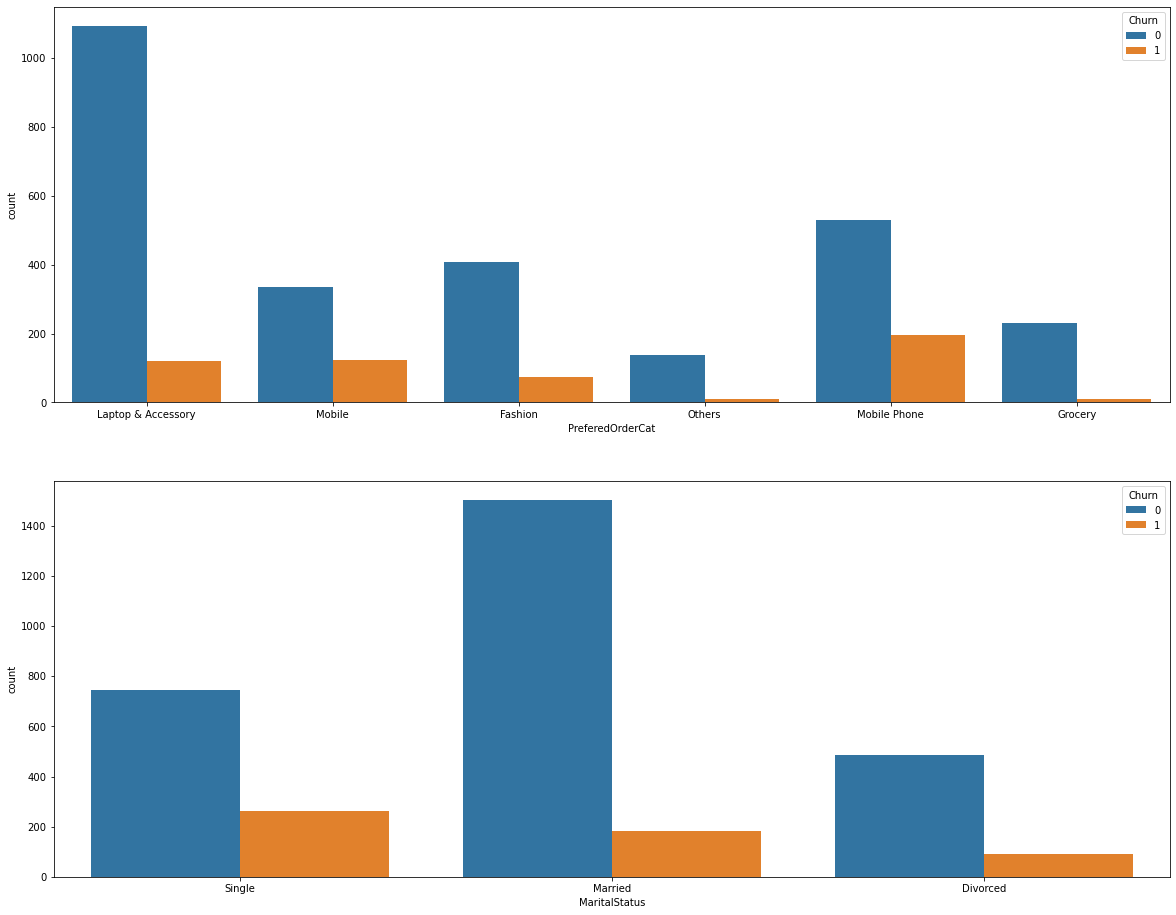

In [39]:
ctg_variables = df.dtypes[df.dtypes == object].index.tolist()

fig, ax = plt.subplots(2, 1, figsize=(20, 16))
for ix, ctg in enumerate(ctg_variables):
    sns.countplot(x=ctg, hue='Churn', data=df, ax=ax.flatten()[ix])

We can sum up that most of customers prefer to buy Laptop, Accessory and Mobile Phone in our platform, and majority of the customers who churned to buy our products are married.

## Data Processing

#### PreferedOrderCat will be proceed with dummy variable, because we assume that every data contain has no either degree or correlation between one and another
#### Cashback Amount will be proceed using Standard Scaler, because there are outliers exist in the data

In [7]:
df_dummmies = pd.get_dummies(df)
df_dummmies.reset_index(drop = True, inplace = True)
df_dummmies.head()


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,15.0,29.0,4,3,2,0,7.0,143.32,0,0,0,1,0,0,0,0,0,1
1,7.0,25.0,4,1,2,0,7.0,129.29,0,0,0,0,1,0,0,0,1,0
2,27.0,13.0,3,1,5,0,7.0,168.54,0,0,0,1,0,0,0,0,1,0
3,20.0,25.0,4,3,7,0,NaN,230.27,0,1,0,0,0,0,0,1,0,0
4,30.0,15.0,4,4,8,0,8.0,322.17,0,0,0,0,0,0,1,0,0,1


## inputation for missing value

In [8]:
impute = IterativeImputer()
array = impute.fit_transform(df_dummmies)
df_new = pd.DataFrame(data = array,columns=['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount', 'Churn', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'])

In [9]:
df_new.isna().sum()

Tenure                                 0
WarehouseToHome                        0
NumberOfDeviceRegistered               0
SatisfactionScore                      0
NumberOfAddress                        0
Complain                               0
DaySinceLastOrder                      0
CashbackAmount                         0
Churn                                  0
PreferedOrderCat_Fashion               0
PreferedOrderCat_Grocery               0
PreferedOrderCat_Laptop & Accessory    0
PreferedOrderCat_Mobile                0
PreferedOrderCat_Mobile Phone          0
PreferedOrderCat_Others                0
MaritalStatus_Divorced                 0
MaritalStatus_Married                  0
MaritalStatus_Single                   0
dtype: int64

In [10]:
df_new.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,15.0,29.0,4.0,3.0,2.0,0.0,7.000000,143.32,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,7.0,25.0,4.0,1.0,2.0,0.0,7.000000,129.29,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,27.0,13.0,3.0,1.0,5.0,0.0,7.000000,168.54,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,20.0,25.0,4.0,3.0,7.0,0.0,6.232287,230.27,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,30.0,15.0,4.0,4.0,8.0,0.0,8.000000,322.17,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## Raw data processing for modelling

In [12]:
df_train, df_test = train_test_split(df_new, test_size=0.2, random_state=36, stratify = df_new['Churn'])

In [16]:
#scaling the train data
std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(df_train[['CashbackAmount']])
xtrain_prepared = pd.DataFrame(data =x_train, columns=['CashbackAmountScaled'])
#combining the data
df_train.reset_index(drop = True, inplace = True)
xtrain_prepared.reset_index(drop = True,inplace = True)
data_train = pd.concat([df_train,xtrain_prepared],axis = 1)
data_train.head(3)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,CashbackAmountScaled
0,0.0,15.000000,3.0,1.0,2.0,0.0,0.0,110.81,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.348823
1,0.0,13.000000,3.0,3.0,2.0,0.0,1.0,148.83,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.580241
2,0.0,15.784898,4.0,5.0,7.0,1.0,0.0,124.04,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.081376


In [17]:
#scaling the test data
std_scaler = StandardScaler()
x_test = std_scaler.fit_transform(df_train[['CashbackAmount']])
xtest_prepared = pd.DataFrame(data =x_test, columns=['CashbackAmountScaled'])
#combining the data
df_train.reset_index(drop = True, inplace = True)
xtest_prepared.reset_index(drop = True,inplace = True)
data_test = pd.concat([df_train,xtest_prepared],axis = 1)


In [20]:
label = ['Churn']
feature = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'CashbackAmountScaled']

## Model Training using several Model

In [21]:
xtrain_final = data_train[feature]
xtest_final = data_test[feature]
ytrain_final = data_train[label]
ytest_final = data_test[label]

#### Def for Classification Evaluation Method

In [23]:
def evaluate(model, x_test = xtest_final, y_test =ytest_final ):
    y_pred = model.predict(x_test)    
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(xtrain_final, ytrain_final)

LogisticRegression()

In [26]:
evaluate(logReg, xtest_final, ytest_final )

Accuracy: 0.8944954128440367
------
Confusion Matrix:

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94      2189
         1.0       0.75      0.54      0.62       427

    accuracy                           0.89      2616
   macro avg       0.83      0.75      0.78      2616
weighted avg       0.89      0.89      0.89      2616

------
Assuming 1 as positive, we get:

True Positive: 229
True Negative: 2111
False Positive: 78
False Negative: 198

Precision: 0.745928338762215
Recall: 0.5362997658079626
F1-Score: 0.6239782016348774


#### Hyperparameter Tuning : MaxIter

In [27]:
rangeMaxIter =range(100, 700, 100)

for k in rangeMaxIter:
    logReg = LogisticRegression(max_iter= k)
    logReg.fit(xtrain_final,ytrain_final)
    r2TrainReg = logReg.score(xtrain_final,ytrain_final)
    r2TestReg = logReg.score(xtest_final,ytest_final)
    print('hasil pada Train set dengan maxIter {} ialah {}'.format(k,r2TrainReg))
    print('hasil pada Test set dengan maxIter {} ialah {}'.format(k,r2TestReg))
    


hasil pada Train set dengan maxIter 100 ialah 0.8944954128440367
hasil pada Test set dengan maxIter 100 ialah 0.8944954128440367
hasil pada Train set dengan maxIter 200 ialah 0.8937308868501529
hasil pada Test set dengan maxIter 200 ialah 0.8937308868501529
hasil pada Train set dengan maxIter 300 ialah 0.8937308868501529
hasil pada Test set dengan maxIter 300 ialah 0.8937308868501529
hasil pada Train set dengan maxIter 400 ialah 0.8937308868501529
hasil pada Test set dengan maxIter 400 ialah 0.8937308868501529
hasil pada Train set dengan maxIter 500 ialah 0.8941131498470948
hasil pada Test set dengan maxIter 500 ialah 0.8941131498470948
hasil pada Train set dengan maxIter 600 ialah 0.893348623853211
hasil pada Test set dengan maxIter 600 ialah 0.893348623853211


# Decision Tree Classifier

In [28]:
dt = DecisionTreeClassifier(random_state = 36, max_depth=12)
dt.fit(xtrain_final,ytrain_final)

DecisionTreeClassifier(max_depth=12, random_state=36)

In [29]:
evaluate(dt, xtest_final, ytest_final)

Accuracy: 0.9942660550458715
------
Confusion Matrix:

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2189
         1.0       1.00      0.97      0.98       427

    accuracy                           0.99      2616
   macro avg       0.99      0.98      0.99      2616
weighted avg       0.99      0.99      0.99      2616

------
Assuming 1 as positive, we get:

True Positive: 414
True Negative: 2187
False Positive: 2
False Negative: 13

Precision: 0.9951923076923077
Recall: 0.9695550351288056
F1-Score: 0.9822064056939502


#### Hyperparameter Tuning

In [31]:
rangeX =range(1,20,5)

for x in rangeX:
    DecTree = DecisionTreeClassifier(max_depth = x)
    DecTree.fit(xtrain_final,ytrain_final)
    r2TrainDecTree = DecTree.score(xtrain_final,ytrain_final)
    r2TestDecTree = DecTree.score(xtest_final,ytest_final)
    print('hasil pada iterasi untuk Train dengan max depth {} ialah {}'.format(x,r2TrainDecTree))
    print('hasil pada iterasi untuk Test dengan max depth {} ialah {}'.format(x,r2TestDecTree))
    


hasil pada iterasi untuk Train dengan max depth 1 ialah 0.8555045871559633
hasil pada iterasi untuk Test dengan max depth 1 ialah 0.8555045871559633
hasil pada iterasi untuk Train dengan max depth 6 ialah 0.9246941896024465
hasil pada iterasi untuk Test dengan max depth 6 ialah 0.9246941896024465
hasil pada iterasi untuk Train dengan max depth 11 ialah 0.9850917431192661
hasil pada iterasi untuk Test dengan max depth 11 ialah 0.9850917431192661
hasil pada iterasi untuk Train dengan max depth 16 ialah 0.9996177370030581
hasil pada iterasi untuk Test dengan max depth 16 ialah 0.9996177370030581


# Random Forest

In [32]:
RandomForest = RandomForestClassifier()
RandomForest.fit(xtrain_final,ytrain_final)

RandomForestClassifier()

In [33]:
evaluate(RandomForest, xtest_final, ytest_final)

Accuracy: 1.0
------
Confusion Matrix:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2189
         1.0       1.00      1.00      1.00       427

    accuracy                           1.00      2616
   macro avg       1.00      1.00      1.00      2616
weighted avg       1.00      1.00      1.00      2616

------
Assuming 1 as positive, we get:

True Positive: 427
True Negative: 2189
False Positive: 0
False Negative: 0

Precision: 1.0
Recall: 1.0
F1-Score: 1.0


# K-Nearest neighbor

In [35]:
knn = KNeighborsClassifier()
knn.fit(xtrain_final,ytrain_final)

KNeighborsClassifier()

In [36]:
evaluate(knn,xtest_final, ytest_final)

Accuracy: 0.908256880733945
------
Confusion Matrix:

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      2189
         1.0       0.83      0.56      0.66       427

    accuracy                           0.91      2616
   macro avg       0.87      0.77      0.81      2616
weighted avg       0.90      0.91      0.90      2616

------
Assuming 1 as positive, we get:

True Positive: 237
True Negative: 2139
False Positive: 50
False Negative: 190

Precision: 0.8257839721254355
Recall: 0.5550351288056206
F1-Score: 0.6638655462184873


# Insight

all model that we used as evaluation has no underfitting or overfitting symptomps, because all the train data and test data evaluation has no signifivant difference

Because of the business Case to determine customers behavior to churn or no, it can be conclude that the best evaluation method is F1 score.

The best mode with highest F1 score is Random Forest